In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
import seaborn as sns
from sklearn import preprocessing 
from statsmodels.tsa.vector_ar.var_model import VAR
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

In [32]:
pip install pmdarima

  Using cached setuptools-69.5.1-py3-none-any.whl.metadata (6.2 kB)
   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
    --------------------------------------- 10.2/625.1 kB ? eta -:--:--
   -- ------------------------------------ 41.0/625.1 kB 487.6 kB/s eta 0:00:02
   ---------------- ----------------------- 256.0/625.1 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 kB 3.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --------------- ------------------------ 1.1/2.8 MB 22.7 MB/s eta 0:00:01
   ---------------------------------------  2.8/2.8 MB 29.6 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 25.6 MB/s eta 0:00:00
Using cached setuptools-69.5.1-py3-none-any.whl (894 kB)
   ---------------------------------------- 0.0/121.1 kB ? eta -:--:--
   ---------------------------------------- 121.1/121.1 kB 7.4 MB/s eta 0:00:00
Note: you may need to restart the kernel 

In [2]:
pd.set_option('display.max_rows', 1000)
import warnings
warnings.filterwarnings('ignore')

Model AR jedna zmienna

In [11]:
path = r'C:\Users\natal\Desktop\Studia\Studia magisterskie\Praca magisterska\Dane walmart 2\train.csv'
def import_data_with_one_feature(path):
    data_train = pd.read_csv(path)
    data_train_clean = data_train[['Store','Date','Weekly_Sales']]
    data_train_ready = data_train_clean.groupby(['Date'], as_index=False).sum()
    data_train_ready = data_train_ready[['Date','Weekly_Sales']]
    return data_train_ready

In [12]:
data_train_ready_one_feature = import_data_with_one_feature(path)
data_train_ready_one_feature

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30
5,2010-03-12,45925396.51
6,2010-03-19,44988974.64
7,2010-03-26,44133961.05
8,2010-04-02,50423831.26
9,2010-04-09,47365290.44


In [7]:
def display_time_series(data):
    sns.lineplot(x=data['Date'], y=data['Weekly_Sales'], marker='o')
    plt.tight_layout()
    plt.show()

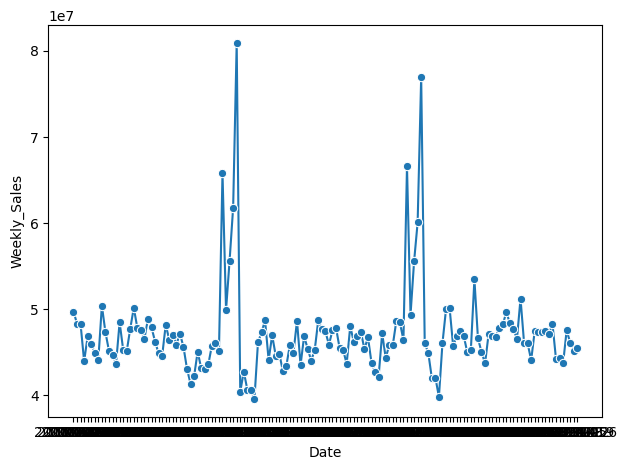

In [8]:
display_time_series(data_train_ready_one_feature)

In [9]:
df_stationarityTest = adfuller(data_train_ready_one_feature['Weekly_Sales'], autolag='AIC')
print("P-value: ", df_stationarityTest[1])
#szereg jest stacjonarny bo mniejsze od 0,05

P-value:  2.675979158986027e-07


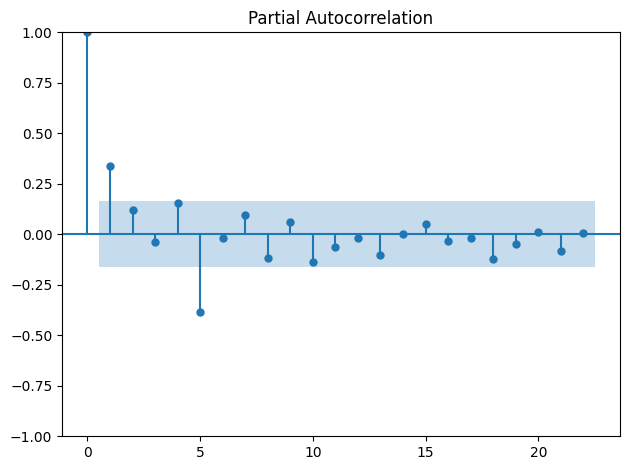

In [10]:
#wykres pacf - funkcja autokorelacji cząstkowej
plot_pacf(data_train_ready_one_feature['Weekly_Sales'])
plt.tight_layout()
#lags=5

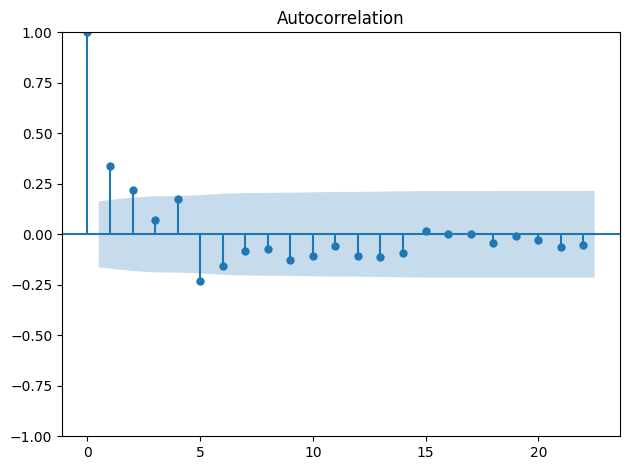

In [11]:
plot_acf(data_train_ready_one_feature['Weekly_Sales'])
plt.tight_layout()
#odpowiedni może być model ma

                            AutoReg Model Results                             
Dep. Variable:           Weekly_Sales   No. Observations:                  128
Model:                     AutoReg(5)   Log Likelihood               -2070.081
Method:               Conditional MLE   S.D. of innovations        4930669.403
Date:                Sat, 27 Apr 2024   AIC                           4154.161
Time:                        16:06:04   BIC                           4173.847
Sample:                             5   HQIC                          4162.157
                                  128                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.349e+07   5.85e+06      5.723      0.000     2.2e+07     4.5e+07
Weekly_Sales.L1     0.3646      0.083      4.388      0.000       0.202       0.527
Weekly_Sales.L2     0.0806      

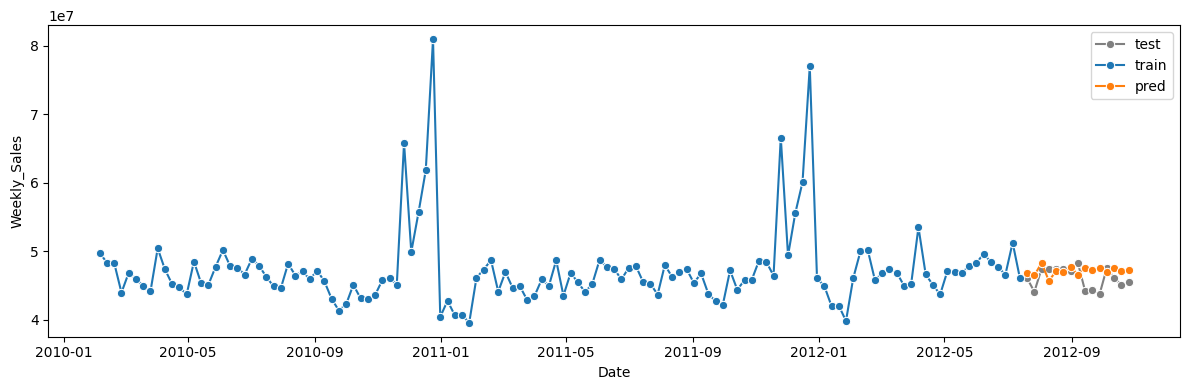

In [62]:
def AR_model(data):
    train_len = int(0.9* len(data))
    train = data['Weekly_Sales'][:train_len]
    ar_model = AutoReg(train, lags = 5).fit()
    print(ar_model.summary())
    pred = ar_model.predict(start=train_len, end=len(data), dynamic=False)
    return pred, train_len

def plot_predict(data, train_len, pred):
    f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
    sns.lineplot(x=data.Date[train_len:len(data)], y=data.Weekly_Sales[train_len:len(data)], marker='o', label='test', color='grey')
    sns.lineplot(x=data.Date[:train_len], y=data.Weekly_Sales[:train_len], marker='o', label='train')
    sns.lineplot(x=data.Date[train_len:len(data)], y=pred, marker='o', label='pred')
    plt.tight_layout()
    plt.show()

prediction_AR, train_len = AR_model(data_train_ready_one_feature)
plot_predict(data_train_ready_one_feature,train_len, prediction_AR)

Model VAR wiele zmiennych

In [4]:
def import_data_with_many_features(path):
    data_train = pd.read_csv(path)
    label_encoder = preprocessing.LabelEncoder()
    data_train['IsHoliday'] = label_encoder.fit_transform(data_train['IsHoliday'])
    data_train_clean = data_train[['Store','Date','Weekly_Sales', 'IsHoliday']]
    data_train_ready = data_train_clean.groupby(['Date','Store', 'IsHoliday'], as_index=False).sum()
    data_train_ready
    return data_train_ready

In [5]:
data_train_ready_many_features = import_data_with_many_features(path)
data_train_ready_many_features

,Date,Store,IsHoliday,Weekly_Sales
0,2010-02-05,1,0,1643690.90
1,2010-02-05,2,0,2136989.46
2,2010-02-05,3,0,461622.22
3,2010-02-05,4,0,2135143.87
4,2010-02-05,5,0,317173.10
...,...,...,...,...
6430,2012-10-26,41,0,1316542.59
6431,2012-10-26,42,0,514756.08
6432,2012-10-26,43,0,587603.55
6433,2012-10-26,44,0,361067.07


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 27, Apr, 2024
Time:                     16:06:42
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    19.0453
Nobs:                     5758.00    HQIC:                   18.8192
Log likelihood:          -78043.5    FPE:                1.32018e+08
AIC:                      18.6984    Det(Omega_mle):     1.25371e+08
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const         33.677616         0.745690           45.163           0.000
L1.y1          0.545553         0.012447           43.829           0.000
L1.y2          0.845333         0.403055            2.097           0.036
L1.y3         -0.

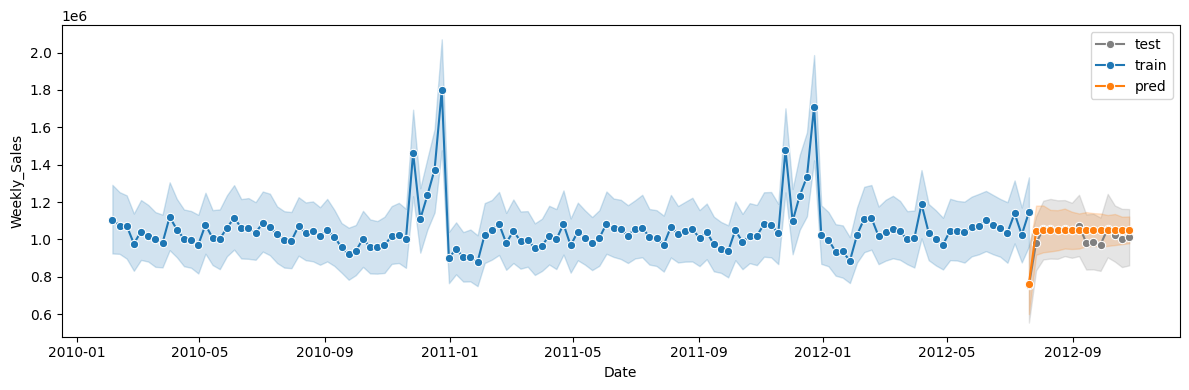

In [63]:
def VAR_method(data):
    train_len = int(0.9* len(data))
    train = data[:int(0.9*(len(data)))]
    test = data[int(0.9*(len(data))):]
    train.index = train.Date
    train = train.drop(['Date'],axis=1)
    test.index = test.Date
    test = test.drop(['Date'],axis=1)
    var_model = VAR(np.asarray(train))
    optimal_lags = var_model.select_order()
    lag_order = optimal_lags.selected_orders['bic']
    results = var_model.fit(lag_order)
    forecast_input = train.values[-lag_order:]
    print(results.summary())
    pred = results.forecast(forecast_input,steps =len(test))
    pred = pred[:,2]
    return pred, train_len

predictions_VAR, train_len = VAR_method(data_train_ready_many_features)

plot_predict(data_train_ready_many_features, train_len, predictions_VAR)

MA model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  128
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -2151.878
Date:                Sat, 27 Apr 2024   AIC                           4317.756
Time:                        16:07:11   BIC                           4337.721
Sample:                             0   HQIC                          4325.868
                                - 128                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.723e+07   6.65e-09   7.11e+15      0.000    4.72e+07    4.72e+07
ma.L1          0.3969      0.074      5.370      0.000       0.252       0.542
ma.L2          0.2872      0.086      3.325      0.0

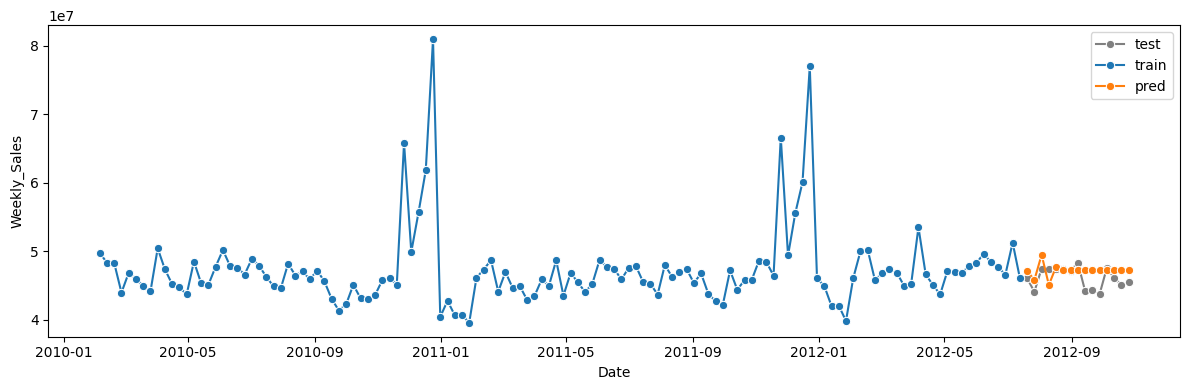

In [64]:
def MA_method(data):
    train_len = int(0.9* len(data))
    train = data[:int(0.9*(len(data)))]
    test = data[int(0.9*(len(data))):]
    train.index = train.Date
    train = train.drop(['Date'],axis=1)
    test.index = test.Date
    test = test.drop(['Date'],axis=1)
    model = ARIMA(np.asarray(train), order=(0,0,5))
    model_fit = model.fit()
    print(model_fit.summary())
    pred_ma = model_fit.get_forecast(steps=len(test))
    pred_ma_series = pd.Series(pred_ma.predicted_mean, index=test.index)
    pred = pred_ma_series.values
    return pred, train_len

pred_MA, train_len = MA_method(data_train_ready_one_feature)
plot_predict(data_train_ready_one_feature, train_len, pred_MA)


ARMA model


In [28]:
def data_ARMA(data):
    train_len = int(0.9* len(data))
    train = data[:int(0.9*(len(data)))]
    test = data[int(0.9*(len(data))):]
    train.index = train.Date
    train = train.drop(['Date'],axis=1)
    test.index = test.Date
    test = test.drop(['Date'],axis=1)
    return train, test, train_len

train_ARMA, test_ARMA, train_len = data_ARMA(data_train_ready_one_feature)

In [27]:
def find_ARIMA_parameters(train):
      p_params = range(0,25,2)
      q_params = range(0,7,1)
      # Create dictionary to store MAEs
      mae_grid = dict()
      # Outer loop: Iterate through possible values for `p`
      for p in p_params:
            # Create key-value pair in dict. Key is `p`, value is empty list.
            mae_grid[p] = list()
            # Inner loop: Iterate through possible values for `q`
            for q in q_params:
            # Combination of hyperparameters for model
                  order = (p, 0, q)
            # Train model
                  model = ARIMA(train, order=order).fit()
                  # Generate in-sample (training) predictions
                  y_pred = model.predict()
                  # Calculate training MAE
                  mae = mean_absolute_error(train, y_pred)
                  # Append MAE to list in dictionary
                  mae_grid[p].append(mae)
            # print(f"Trained ARIMA {order} with mae {mae}")
      # print(mae_grid)
      mae_df = pd.DataFrame(mae_grid) 
      print(mae_df)
      # mae_df.round(4)

find_ARIMA_parameters(train_ARMA)

             0             2             4             6             8   \
0  3.117981e+06  2.968612e+06  2.962795e+06  2.959770e+06  2.989173e+06   
1  2.996547e+06  2.904068e+06  2.913525e+06  2.967052e+06  2.985005e+06   
2  2.960804e+06  3.040046e+06  3.022685e+06  2.976594e+06  3.057376e+06   
3  3.058882e+06  3.095814e+06  3.017812e+06  3.169406e+06  3.026243e+06   
4  2.985679e+06  2.938582e+06  2.904379e+06  3.139514e+06  2.906708e+06   
5  2.942595e+06  3.081946e+06  3.077555e+06  3.068713e+06  3.049453e+06   
6  2.925863e+06  3.091795e+06  3.085280e+06  3.049753e+06  3.008941e+06   

             10            12            14            16            18  \
0  2.993132e+06  2.985178e+06  3.012469e+06  2.996708e+06  2.993052e+06   
1  3.074052e+06  2.983702e+06  3.000092e+06  2.995564e+06  2.972311e+06   
2  3.070876e+06  3.076889e+06  3.010952e+06  3.069102e+06  2.971270e+06   
3  3.020158e+06  3.020147e+06  3.024987e+06  2.964537e+06  3.090677e+06   
4  3.024003e+06  3.00811

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  128
Model:                ARIMA(16, 0, 4)   Log Likelihood               -2146.800
Date:                Sat, 27 Apr 2024   AIC                           4337.600
Time:                        16:07:58   BIC                           4400.345
Sample:                             0   HQIC                          4363.094
                                - 128                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.723e+07   5.46e-08   8.65e+14      0.000    4.72e+07    4.72e+07
ar.L1         -0.0923      0.199     -0.465      0.642      -0.481       0.297
ar.L2         -0.1278      0.198     -0.644      0.5

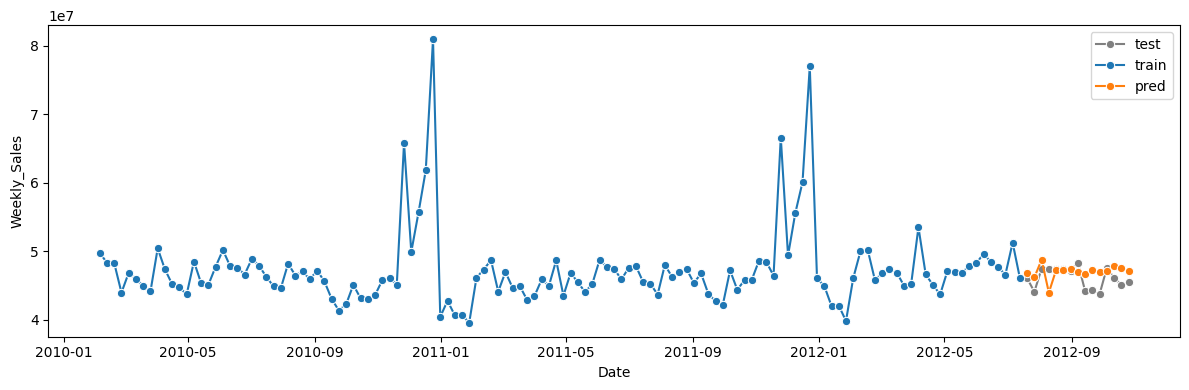

In [65]:
def ARMA_method(train, test):
    model = ARIMA(np.asarray(train), order=(16,0,4))
    model_fit = model.fit()
    print(model_fit.summary())
    pred_ma = model_fit.get_forecast(steps=len(test))
    pred_ma_series = pd.Series(pred_ma.predicted_mean, index=test.index)
    pred = pred_ma_series.values
    return pred

prediction_ARMA = ARMA_method(train_ARMA, test_ARMA)
plot_predict(data_train_ready_one_feature, train_len, prediction_ARMA)


ARIMA model

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  128
Model:                ARIMA(16, 0, 4)   Log Likelihood               -2146.800
Date:                Sat, 27 Apr 2024   AIC                           4337.600
Time:                        16:08:20   BIC                           4400.345
Sample:                             0   HQIC                          4363.094
                                - 128                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.723e+07   5.46e-08   8.65e+14      0.000    4.72e+07    4.72e+07
ar.L1         -0.0923      0.199     -0.465      0.642      -0.481       0.297
ar.L2         -0.1278      0.198     -0.644      0.5

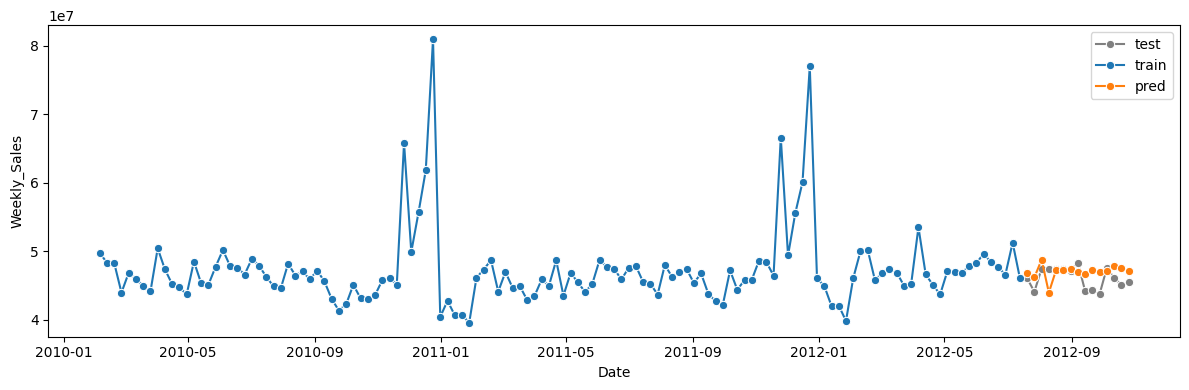

In [66]:
#parametry modelu arima są bez zmian ponieważ szereg jest stacjonarny
def ARIMA_method(train, test):
    model = ARIMA(np.asarray(train), order=(16,0,4))
    model_fit = model.fit()
    print(model_fit.summary())
    pred_ma = model_fit.get_forecast(steps=len(test))
    pred_ma_series = pd.Series(pred_ma.predicted_mean, index=test.index)
    pred = pred_ma_series.values
    return pred

prediction_ARIMA = ARIMA_method(train_ARMA, test_ARMA)
plot_predict(data_train_ready_one_feature, train_len, prediction_ARIMA)


SARIMA model

In [33]:
import pmdarima as pmd

model=pmd.auto_arima(np.asarray(train_ARMA),start_p=1,start_q=1,test='adf',m=12,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=4349.620, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=4338.038, Time=0.36 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=4342.211, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=4890.748, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=4336.369, Time=0.01 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=4337.870, Time=0.07 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=4336.483, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=4337.556, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=4340.944, Time=0.02 sec
 ARIMA(2,0,1)(0,0,0)[12] intercept   : AIC=4338.466, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[12]             : AIC=inf, Time=0.01 sec

Best model:  ARIMA(1,0,0)(0,0,0)[12] intercept
Total fit time: 1.951 seconds


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  128
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -2193.048
Date:                Sat, 27 Apr 2024   AIC                           4390.096
Time:                        16:08:33   BIC                           4395.800
Sample:                             0   HQIC                          4392.413
                                - 128                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9905      0.009    113.359      0.000       0.973       1.008
sigma2       4.32e+13   2.47e-17   1.75e+30      0.000    4.32e+13    4.32e+13
Ljung-Box (L1) (Q):                  22.13   Jarque-

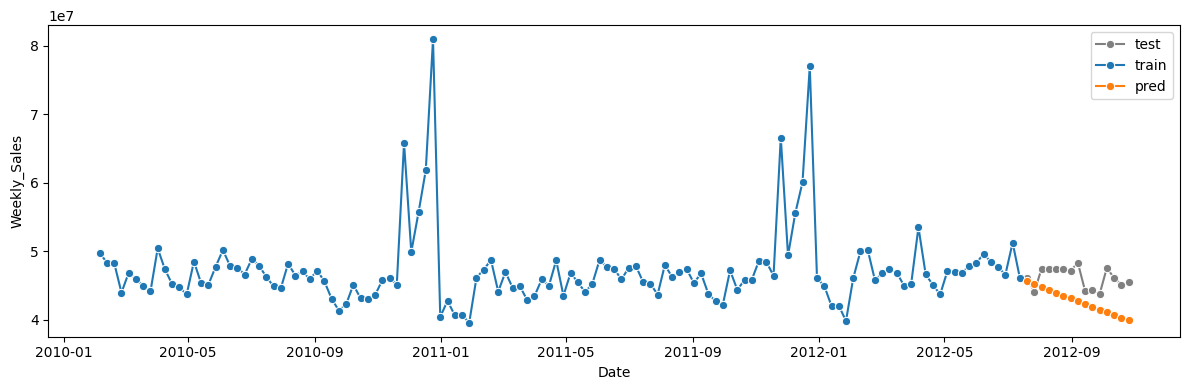

In [67]:
def SARIMA_method(train, test):
    model = sm.tsa.statespace.SARIMAX(np.asarray(train),order=(1,0,0),seasonal_order=(0,0,0,12))
    model_fit = model.fit()
    print(model_fit.summary())
    pred_ma = model_fit.get_forecast(steps=len(test))
    pred_ma_series = pd.Series(pred_ma.predicted_mean, index=test.index)
    pred = pred_ma_series.values
    return pred

prediction_SARIMA = SARIMA_method(train_ARMA, test_ARMA)
plot_predict(data_train_ready_one_feature, train_len, prediction_SARIMA)


Metody uczenia maszynowego

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import datetime as dt

In [49]:
def data_ML_one_feature(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.copy()
    data['dayofweek'] = data.Date.dt.weekday
    data['quarter'] = data.Date.dt.quarter
    data['month'] = data.Date.dt.month
    data['year'] = data.Date.dt.year
    data['dayofyear'] = data.Date.dt.dayofyear
    data['dayofmonth'] = data.Date.dt.day
    data['weekofyear'] = data.Date.dt.isocalendar().week
    train_len = int(0.9* len(data))
    train = data[:train_len]
    test = data[train_len:]
    X_train = train[['dayofweek', 'quarter', 'month', 'year',
        'dayofyear', 'dayofmonth', 'weekofyear']]
    Y_train = train[['Weekly_Sales']]
    X_test = test[[ 'dayofweek', 'quarter', 'month', 'year',
        'dayofyear', 'dayofmonth', 'weekofyear']]
    Y_test = test[['Weekly_Sales']]
    return X_train, Y_train, X_test, Y_test, train_len

X_train_one, Y_train_one, X_test_one, Y_test_one, train_len_one = data_ML_one_feature(data_train_ready_one_feature)


In [50]:
def data_ML_many_features(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data = data.copy()
    data['dayofweek'] = data.Date.dt.weekday
    data['quarter'] = data.Date.dt.quarter
    data['month'] = data.Date.dt.month
    data['year'] = data.Date.dt.year
    data['dayofyear'] = data.Date.dt.dayofyear
    data['dayofmonth'] = data.Date.dt.day
    data['weekofyear'] = data.Date.dt.isocalendar().week
    train_len = int(0.9* len(data))
    train = data[:train_len]
    test = data[train_len:]
    X_train = train[['dayofweek', 'quarter', 'month', 'year',
        'dayofyear', 'dayofmonth', 'weekofyear','Store', 'IsHoliday']]
    Y_train = train[['Weekly_Sales']]
    X_test = test[[ 'dayofweek', 'quarter', 'month', 'year',
        'dayofyear', 'dayofmonth', 'weekofyear','Store', 'IsHoliday']]
    Y_test = test[['Weekly_Sales']]
    return X_train, Y_train, X_test, Y_test, train_len

X_train_many, Y_train_many, X_test_many, Y_test_many, train_len_many = data_ML_one_feature(data_train_ready_many_features)

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
import datetime
import glob
import pandas as pd
import os
from sklearn.preprocessing import OneHotEncoder
import sklearn.cluster
from sklearn.cluster import KMeans
import os
from sklearn.preprocessing import StandardScaler
from datetime import date,timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2,f_classif,f_regression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

In [40]:
def Decision_Tree(X_train, Y_train, X_test, Y_test):
    numerical = X_train.select_dtypes('number').columns
    max_features = ['auto', 'sqrt']
    criterion = ['friedman_mse', 'absolute_error', 'poisson']
    splitter = ['best','random']
    max_depth = [int(z) for z in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    min_samples_split = [2, 5, 10]
    min_samples_leaf = [1, 2, 4]
    random_grid = {'criterion' : criterion,
                'splitter' : splitter,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf}
    grid_list = {"C": np.arange(2, 10, 2),
                "gamma": np.arange(0.1, 1, 0.2)}
    numerical_pipe = Pipeline([
        ('scaler', StandardScaler())
    ])

    preprocessors = ColumnTransformer(transformers=[
        ('num', numerical_pipe, numerical)
    ])

    pipe = Pipeline([
        ('preprocessors', preprocessors),
        # ('select',SelectKBest(score_func=f_regression, k=4)),
        ('tree_one_feature',GridSearchCV(DecisionTreeRegressor(), param_grid = random_grid, 
            cv = 50, verbose=2, n_jobs = -1))])

    pipe.fit(X_train,Y_train)
    predictions = pipe.predict(X_test)
    rmse = float(format(np.sqrt(mean_squared_error(Y_test, predictions)), '.3f'))
    print("\nRMSE: ", rmse)
    return predictions

prediction_DT_one = Decision_Tree(X_train_one, Y_train_one, X_test_one, Y_test_one)

Fitting 50 folds for each of 1296 candidates, totalling 64800 fits

RMSE:  1814464.385


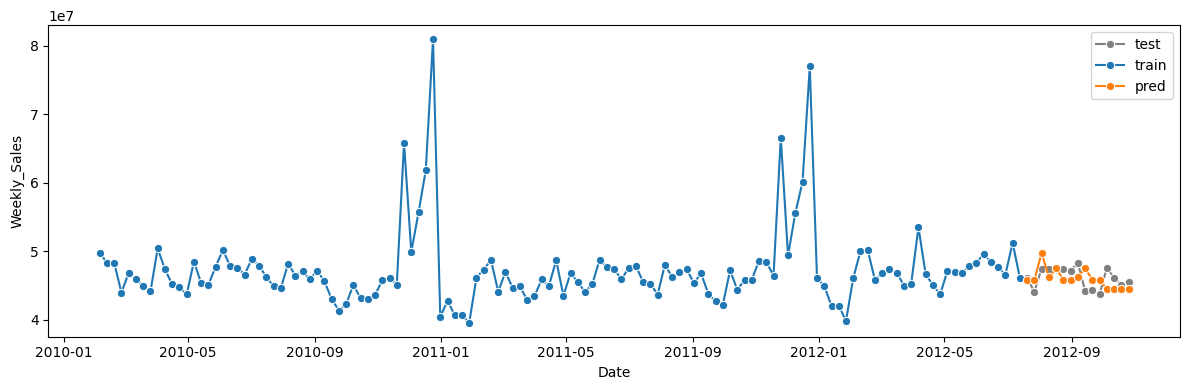

In [68]:
plot_predict(data_train_ready_one_feature, train_len_one, prediction_DT_one)


In [45]:
prediction_DT_many = Decision_Tree(X_train_many, Y_train_many, X_test_many, Y_test_many)


Fitting 50 folds for each of 1296 candidates, totalling 64800 fits

RMSE:  527184.771


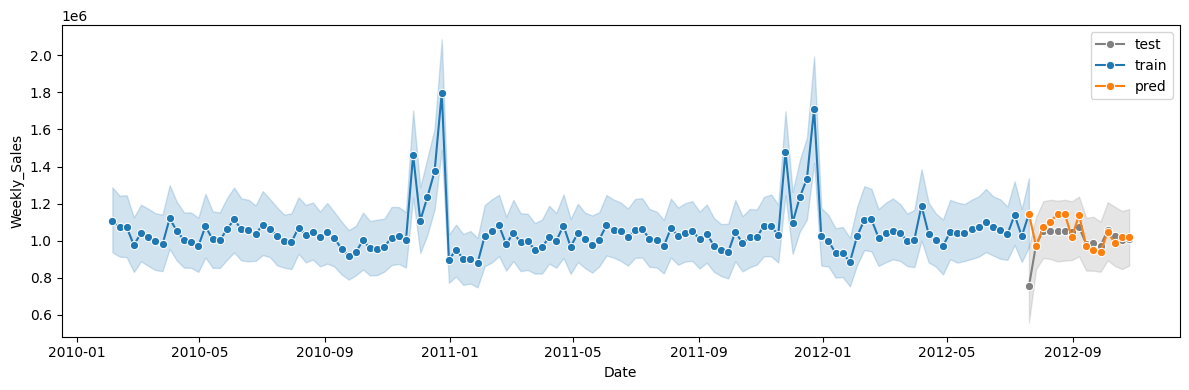

In [69]:
plot_predict(data_train_ready_many_features, train_len_many, prediction_DT_many)

In [54]:
def Random_Forest(X_train, Y_train, X_test, Y_test):
    numerical = X_train.select_dtypes('number').columns
    n_estimators = [int(z) for z in np.linspace(start = 200, stop = 2000, num = 10)]
    max_features = ['auto', 'sqrt']
    criterion = ['friedman_mse', 'absolute_error', 'poisson']
    max_depth = [int(z) for z in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    min_samples_split = [2, 5, 10]
    min_samples_leaf = [1, 2, 4]
    bootstrap = [True, False]
    random_grid = {'n_estimators' : n_estimators,
                    'criterion' : criterion,
                    'max_features': max_features,
                    'max_depth': max_depth,
                    'min_samples_split': min_samples_split,
                    'min_samples_leaf': min_samples_leaf,
                    'bootstrap' : bootstrap}
    grid_list = {"C": np.arange(2, 10, 2),
                "gamma": np.arange(0.1, 1, 0.2)}
    numerical_pipe = Pipeline([
        ('scaler', StandardScaler())
    ])

    preprocessors = ColumnTransformer(transformers=[
        ('num', numerical_pipe, numerical)
    ])

    pipe = Pipeline([
        ('preprocessors', preprocessors),
        # ('select',SelectKBest(score_func=f_regression, k=4)),
        # ('tree_one_feature',GridSearchCV(RandomForestRegressor(), param_grid = random_grid, 
        #     cv = 5, verbose=2, n_jobs = -1))])
        ('tree_one_feature',RandomizedSearchCV(RandomForestRegressor(), param_distributions = random_grid, n_iter = 30,
            cv = 3, verbose=2, random_state=42, n_jobs = -1))])

    pipe.fit(X_train,Y_train)
    predictions = pipe.predict(X_test)
    rmse = float(format(np.sqrt(mean_squared_error(Y_test, predictions)), '.3f'))
    print("\nRMSE: ", rmse)
    return predictions

prediction_RF_one = Random_Forest(X_train_one, Y_train_one, X_test_one, Y_test_one)
prediction_RF_many = Random_Forest(X_train_many, Y_train_many, X_test_many, Y_test_many)

Fitting 3 folds for each of 30 candidates, totalling 90 fits

RMSE:  765240.317
Fitting 3 folds for each of 30 candidates, totalling 90 fits

RMSE:  526265.034


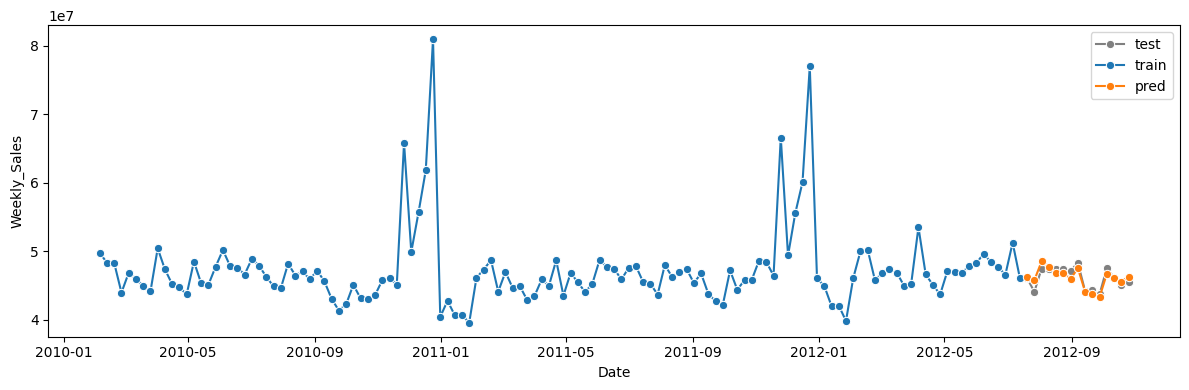

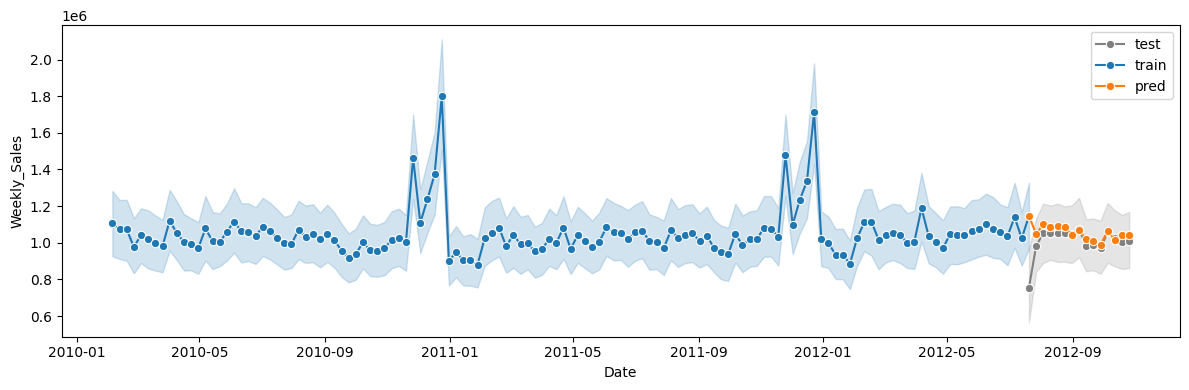

In [70]:
plot_predict(data_train_ready_one_feature, train_len_one, prediction_RF_one)
plot_predict(data_train_ready_many_features, train_len_many, prediction_RF_many)


In [59]:
from xgboost import XGBRegressor

In [60]:
def XGB_method(X_train, Y_train, X_test, Y_test):
    numerical = X_train.select_dtypes('number').columns
    n_estimators = [int(z) for z in np.linspace(start = 200, stop = 2000, num = 10)]
    max_depth = [int(z) for z in np.linspace(10, 110, num = 11)]
    max_depth.append(None)
    eta = [int(z) for z in np.linspace(0, 1, num = 10)]
    subsample = [int(z) for z in np.linspace(0.05, 1, num = 10)]
    colsample_bytree = [int(z) for z in np.linspace(0.05, 1, num = 10)]
    random_grid = {'n_estimators' : n_estimators,
                    'max_depth': max_depth,
                    'eta': eta,
                    'subsample': subsample,
                    'colsample_bytree' : colsample_bytree}
    grid_list = {"C": np.arange(2, 10, 2),
                "gamma": np.arange(0.1, 1, 0.2)}
    numerical_pipe = Pipeline([
        ('scaler', StandardScaler())
    ])

    preprocessors = ColumnTransformer(transformers=[
        ('num', numerical_pipe, numerical)
    ])

    pipe = Pipeline([
        ('preprocessors', preprocessors),
        # ('select',SelectKBest(score_func=f_regression, k=4)),
        # ('tree_one_feature',GridSearchCV(XGBRegressor(), param_grid = random_grid, 
        #     cv = 5, verbose=2, n_jobs = -1))])
        ('tree_one_feature',RandomizedSearchCV(XGBRegressor(), param_distributions = random_grid, n_iter = 30,
            cv = 3, verbose=2, random_state=42, n_jobs = -1))])

    pipe.fit(X_train,Y_train)
    predictions = pipe.predict(X_test)
    rmse = float(format(np.sqrt(mean_squared_error(Y_test, predictions)), '.3f'))
    print("\nRMSE: ", rmse)
    return predictions

prediction_XGB_one = XGB_method(X_train_one, Y_train_one, X_test_one, Y_test_one)
prediction_XGB_many = XGB_method(X_train_many, Y_train_many, X_test_many, Y_test_many)

Fitting 3 folds for each of 30 candidates, totalling 90 fits

RMSE:  892170.077
Fitting 3 folds for each of 30 candidates, totalling 90 fits

RMSE:  525540.152


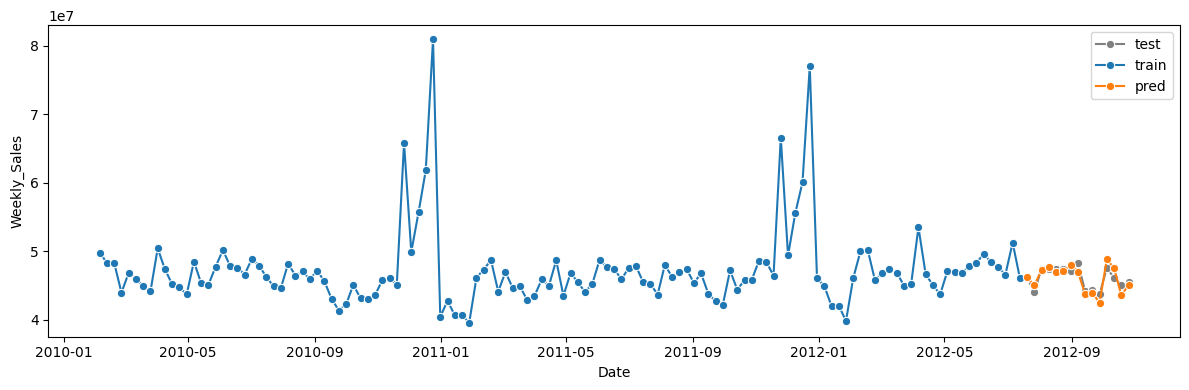

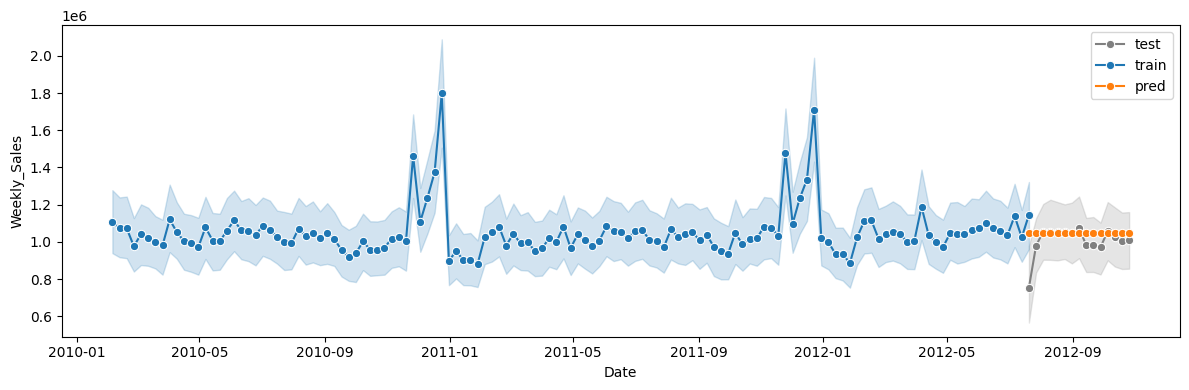

In [71]:
plot_predict(data_train_ready_one_feature, train_len_one, prediction_XGB_one)
plot_predict(data_train_ready_many_features, train_len_many, prediction_XGB_many)
